<a href="https://colab.research.google.com/github/giannisgian/diafores-ergasies/blob/main/homework_8_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [ ]:
df = pd.DataFrame(columns = ['Title', 'Date', 'URL', 'Description', 'About_text', 'About_URL'])

In [ ]:
titles = []#check
links = []#check
authors = [] # authors don't exist
dates = []#check
descs = []#check
abouts_text = []#check
abouts_URL = []#check


for i in range(1,6):
  my_url = 'https://www.news247.gr/latest/?pages='+str(i)
  req = Request(my_url,headers={'User-Agent': 'Mozilla/5.0'})
  # print(my_url)
  raw_html = urlopen(req).read()
  news = BeautifulSoup(raw_html, "html.parser")


  titles_soup = news.find_all("h2", {"class": "article__title bold"})

  # links = news.find_all("h2", {"class": "article__title bold"})
  for title in titles_soup:
    links.append(title.find('a')['href'])
    titles.append((title.text).replace('\n',''))

  abouts_soup = news.find_all("div", {"class": "article__summary"})
  for about in abouts_soup:
    info = (about.text).splitlines()
    # print(info)
    abouts_text.append(info[1])

    descs.append(info[2])

    dates.append(info[3])

    abouts_URL.append(about.find('a')['href'])

print(len(titles))
print(len(links))
print(len(dates))
print(len(descs))
print(len(abouts_text))
print(len(abouts_URL))

    

200
200
200
200
200
200


In [ ]:
# df = pd.DataFrame(columns = ['Title', 'Date', 'URL', 'Description', 'About_text', 'About_URL'])

for i in range(0, len(titles)):
  df = df.append({'Title' : titles[i], 'Date' : dates[i], 'URL' : links[i], 'Description' : descs[i], 'About_text' : abouts_text[i], 'About_URL' : abouts_URL[i]}, ignore_index=True)


In [ ]:
df

,Title,Date,URL,Description,About_text,About_URL
0,"Κάτια Ταραμπάνκο: Η καλοκαιρινή ""WCselfie"" με ...",Ιουνίου 07 2022 18:31,https://www.news247.gr/celebrities/katia-taram...,"Το γνωστό μοντέλο έστειλε ""ινσταγκραμικούς"" χα...",ΚΑΤΙΑ ΤΑΡΑΜΠΑΝΚΟ,https://www.news247.gr/katia-tarampanko
1,Ουκρανία: Νέοι βομβαρδισμοί των ρωσικών δυνάμε...,Ιουνίου 07 2022 18:30,https://www.news247.gr/kosmos/oykrania-neoi-vo...,Έναν νεκρό άφησαν πίσω τους οι νέοι βομβαρδισμ...,ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ,https://www.news247.gr/polemos-stin-oykrania
2,Survivor Spoiler: Αυτή η ομάδα κερδίζει απόψε ...,Ιουνίου 07 2022 18:27,https://www.news247.gr/psixagogia/tileorasi/su...,Μεγάλη ανατροπή στο αποψινό επεισόδιο του Surv...,SURVIVOR,https://www.news247.gr/survivor
3,Γενική Συνέλευση ΣΕΒ: Το Δ.Σ. προτείνει την επ...,Ιουνίου 07 2022 18:14,https://www.news247.gr/oikonomia/geniki-synele...,Την επανεκλογή δύο διοικητικών προσώπων θα ζητ...,ΣΕΒ,https://www.news247.gr/sev
4,Θεσσαλονίκη: Επεισόδιο με πυροβολισμούς στον Φ...,Ιουνίου 07 2022 18:02,https://www.news247.gr/koinonia/thessaloniki-e...,Ένοπλος πυροβόλησε τουλάχιστον πέντε φορές στο...,ΠΥΡΟΒΟΛΙΣΜΟΙ,https://www.news247.gr/pyrovolismoi
...,...,...,...,...,...,...
195,"Βρετανία: Παραιτήθηκε ο ""τσάρος κατά της διαφθ...",Ιουνίου 06 2022 14:10,https://www.news247.gr/kosmos/vretania-paraiti...,Παραιτήθηκε ο βουλευτής των Τόρις Τζον Πένροου...,ΜΕΓΑΛΗ ΒΡΕΤΑΝΙΑ,https://www.news247.gr/megali-bretania
196,"ΗΠΑ-Ρωσία: ""Μην κλείσετε την πρεσβεία σας στην...",Ιουνίου 06 2022 14:07,https://www.news247.gr/kosmos/ipa-rosia-min-kl...,Ο Αμερικανός πρεσβευής των ΗΠΑ στη Μόσχα κάλεσ...,ΗΠΑ,https://www.news247.gr/hpa
197,Χαρίτσης: Ο πληθωρισμός δεν είναι φυσικό επόμενο,Ιουνίου 06 2022 14:07,https://www.news247.gr/politiki/charitsis-o-pl...,Ο Αλέξης Χαρίτσης σε εκτενή τοποθέτησή του για...,ΣΥ.ΡΙΖ.Α.,https://www.news247.gr/syriza
198,Μεγάλη Βρετανία: Εγκατέλειψαν επιβάτη με αναπη...,Ιουνίου 06 2022 14:00,https://www.news247.gr/kosmos/megali-vretania-...,Σοκάρει η ανάλγητη αντιμετώπιση που είχε επιβά...,ΑΕΡΟΜΕΤΑΦΟΡΕΣ,https://www.news247.gr/aerometafores


In [ ]:
df.groupby('About_text').size().sort_values(ascending=False).head(10)

About_text
ADVERTORIAL              12
ΗΠΑ                       7
ΠΟΛΕΜΟΣ ΣΤΗΝ ΟΥΚΡΑΝΙΑ     6
ΠΑΝΕΛΛΗΝΙΕΣ 2022          6
ΦΩΤΙΑ                     5
ΤΟΥΡΚΙΑ                   5
ΑΣΤΥΝΟΜΙΑ                 5
ΡΩΣΙΑ                     5
SURVIVOR                  4
ΓΕΡΜΑΝΙΑ                  4
dtype: int64

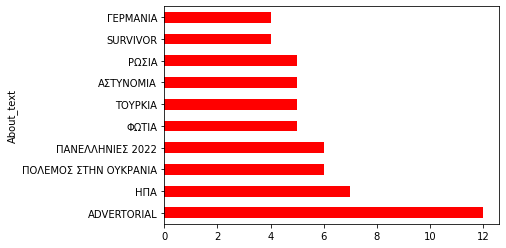

In [ ]:
df.groupby('About_text').size().sort_values(ascending=False).head(10).plot(kind='barh', color='red')

In [ ]:
from google.colab import files

df.to_csv('output.csv', encoding = 'utf-8-sig') 
files.download('output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>